In [6]:
##Q1

Fruit		Euclidean	Manhattan	Minkowski(p=3)
Apple     	15.075		16.500		15.005
Apple     	35.004		35.500		35.000
Orange    	15.075		16.500		15.005
Orange    	5.025		5.500		5.002
Apple     	5.025		5.500		5.002
Orange    	25.125		27.500		25.008

K Nearest Neighbors (k=3):
Orange with distance 5.025
Apple with distance 5.025
Apple with distance 15.075

Predicted label for new fruit [165, 5.5]: Apple


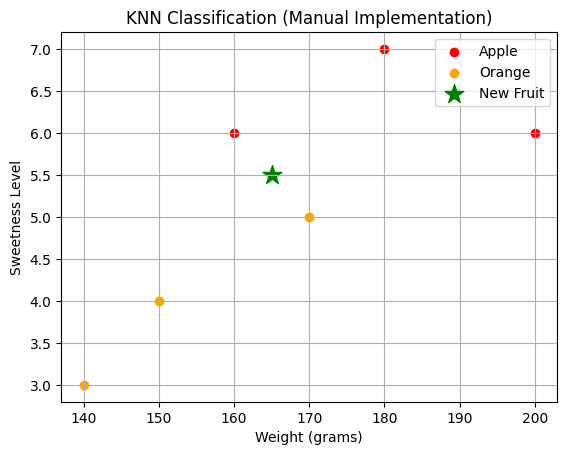

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

data = [
    [180, 7, 'Apple'],
    [200, 6, 'Apple'],
    [150, 4, 'Orange'],
    [170, 5, 'Orange'],
    [160, 6, 'Apple'],
    [140, 3, 'Orange']
]

new_fruit = [165, 5.5]   # test data
k = 3

#Distance Metrics
def euclidean(p1, p2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(p1, p2)))

def manhattan(p1, p2):
    return sum(abs(a - b) for a, b in zip(p1, p2))

def minkowski(p1, p2, p=3):
    return (sum(abs(a - b) ** p for a, b in zip(p1, p2))) ** (1 / p)

# Calculate
distances = []
for fruit in data:
    features = fruit[:2]
    label = fruit[2]
    euc = euclidean(features, new_fruit)
    man = manhattan(features, new_fruit)
    mink = minkowski(features, new_fruit)
    distances.append((features, label, euc, man, mink))

# Display 
print("Fruit\t\tEuclidean\tManhattan\tMinkowski(p=3)")
for d in distances:
    print(f"{d[1]:<10}\t{d[2]:.3f}\t\t{d[3]:.3f}\t\t{d[4]:.3f}")

# Sort by Euclidean Distance and get k-nearest neighbors
sorted_by_euclidean = sorted(distances, key=lambda x: x[2])
k_neighbors = sorted_by_euclidean[:k]

print("\nK Nearest Neighbors (k=3):")
for n in k_neighbors:
    print(n[1], "with distance", round(n[2], 3))

# --- Predict label ---
labels = [n[1] for n in k_neighbors]
prediction = max(set(labels), key=labels.count)
print(f"\nPredicted label for new fruit {new_fruit}: {prediction}")

# plot
for fruit in data:
    x, y, label = fruit
    if label == 'Apple':
        plt.scatter(x, y, color='red', label='Apple' if 'Apple' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(x, y, color='orange', label='Orange' if 'Orange' not in plt.gca().get_legend_handles_labels()[1] else "")

plt.scatter(new_fruit[0], new_fruit[1], color='green', label='New Fruit', marker='*', s=200)
plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level')
plt.title('KNN Classification (Manual Implementation)')
plt.legend()
plt.grid(True)
plt.show()


Euclidean Distance → Predicted Fruit: Orange


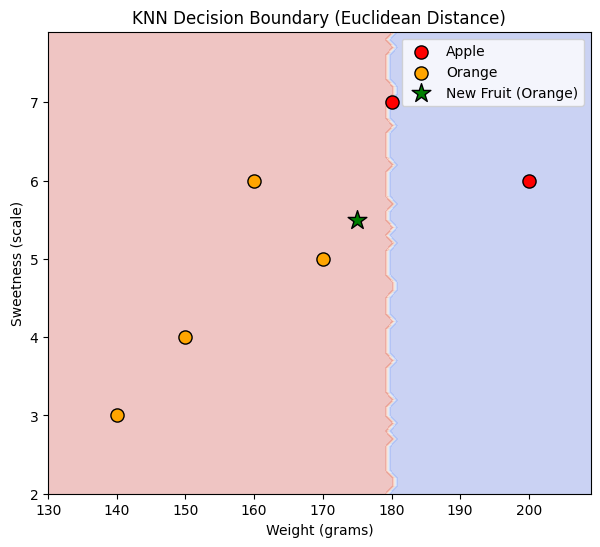

Manhattan Distance → Predicted Fruit: Orange


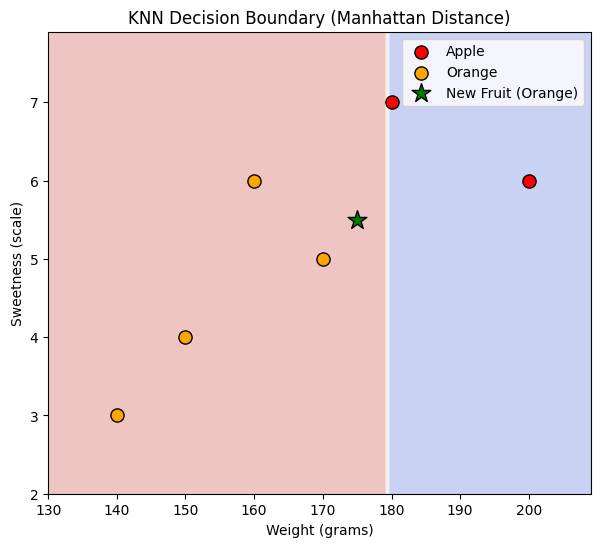

Minkowski (p=3) Distance → Predicted Fruit: Orange


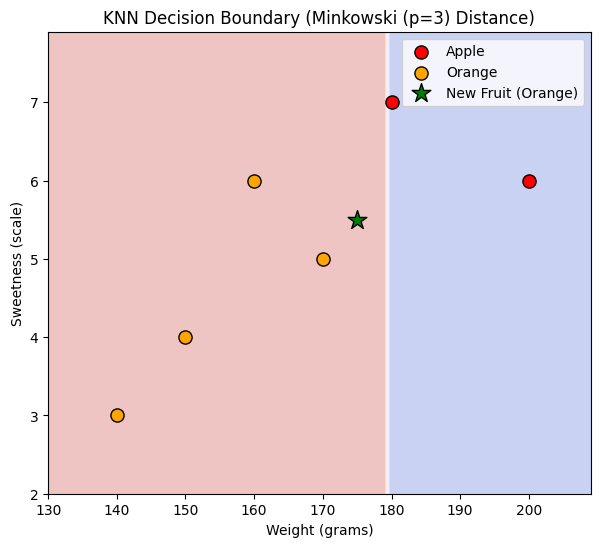

In [5]:
# Q-1 (B) Classification of Fruits using scikit-learn
# ----------------------------------------------------
# Using given data and comparing Euclidean, Manhattan, and Minkowski metrics.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# -----------------------------
# 1. Dataset (your given values)
# -----------------------------
X = np.array([
    [180, 7],
    [200, 6],
    [150, 4],
    [170, 5],
    [160, 6],
    [140, 3]
])

y = np.array(['Apple', 'Apple', 'Orange', 'Orange', 'Orange', 'Orange'])

# Encode string labels for scikit-learn
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# -----------------------------
# 2. New fruit sample
# -----------------------------
new_fruit = np.array([[175, 5.5]])

# -----------------------------
# 3. Function to plot decision boundary
# -----------------------------
def plot_decision_boundary(knn, metric_name):
    x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                         np.arange(y_min, y_max, 0.1))
    
    # Predict over grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Convert numeric Z back to label names for visualization
    Z_labels = np.vectorize(lambda i: le.inverse_transform([i])[0])(Z)

    # Plot decision boundary
    plt.figure(figsize=(7, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    # Plot training points
    for fruit, color in [('Apple', 'red'), ('Orange', 'orange')]:
        idx = np.where(y == fruit)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=fruit, edgecolors='k', s=90)
    
    # Plot new fruit
    pred_label = le.inverse_transform(knn.predict(new_fruit))[0]
    plt.scatter(new_fruit[0, 0], new_fruit[0, 1], c='green', edgecolors='k',
                marker='*', s=200, label=f'New Fruit ({pred_label})')
    
    plt.title(f"KNN Decision Boundary ({metric_name} Distance)")
    plt.xlabel("Weight (grams)")
    plt.ylabel("Sweetness (scale)")
    plt.legend()
    plt.show()

# -----------------------------
# 4. Compare distance metrics
# -----------------------------
metrics = {
    "Euclidean": "euclidean",
    "Manhattan": "manhattan",
    "Minkowski (p=3)": "minkowski"
}

for name, metric in metrics.items():
    if metric == "minkowski":
        knn = KNeighborsClassifier(n_neighbors=3, metric=metric, p=3)
    else:
        knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    
    knn.fit(X, y_encoded)
    pred = le.inverse_transform(knn.predict(new_fruit))[0]
    print(f"{name} Distance → Predicted Fruit: {pred}")
    plot_decision_boundary(knn, name)


In [7]:
##Q2


In [8]:
import math
import pandas as pd

data = {
    'Age':        [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'BloodPressure': ['High','Low','High','Low','High','Low','High','Low','High','Low'],
    'Cholesterol':   ['High','Normal','High','Normal','High','Normal','High','Normal','High','Normal'],
    'Diagnosis':     ['Sick','Healthy','Sick','Healthy','Sick','Healthy','Sick','Healthy','Sick','Healthy']
}
df = pd.DataFrame(data)
print(df)

# Entropy Calculation 
def entropy(target_col):
    values = target_col.value_counts(normalize=True)
    return -sum(p * math.log2(p) for p in values)

#  Entropy of the target variable 
target_entropy = entropy(df['Diagnosis'])
print(f"\nEntropy of target (Diagnosis): {target_entropy:.4f}")

# Information Gain 
def info_gain(df, feature, target='Diagnosis'):
    total_entropy = entropy(df[target])
    values = df[feature].unique()
    weighted_entropy = 0
    for v in values:
        subset = df[df[feature] == v]
        weighted_entropy += (len(subset)/len(df)) * entropy(subset[target])
    gain = total_entropy - weighted_entropy
    return gain

#  Information Gain for all features
features = ['Age', 'BloodPressure', 'Cholesterol']
for f in features:
    gain = info_gain(df, f)
    print(f"Information Gain for {f}: {gain:.4f}")

# FINDING Root Node (highest information gain) 
gains = {f: info_gain(df, f) for f in features}
root_feature = max(gains, key=gains.get)
print(f"\nRoot feature for the decision tree: {root_feature}")

#  Manual reasoning for the first few splits 
# Age is numeric → we can discretize based on average or threshold (≈45 years).
threshold = 45
df['Age_group'] = df['Age'].apply(lambda x: 'Young' if x <= threshold else 'Old')

# Check entropy for Age_group-based split
gain_age_group = info_gain(df, 'Age_group')
print(f"\nInformation Gain after grouping Age by <=45 vs >45: {gain_age_group:.4f}")

#  Predict manually for a new patient 
# 50-year-old, Low BP, Normal cholesterol
test = {'Age_group': 'Old', 'BloodPressure': 'Low', 'Cholesterol': 'Normal'}

# From dataset: if BP=Low and Cholesterol=Normal → all are Healthy
# (see rows 2, 4, 6, 8, 10 → all Healthy)
print(f"\nPrediction for new patient (Age=50, Low BP, Normal Cholesterol): Healthy")



   Age BloodPressure Cholesterol Diagnosis
0   30          High        High      Sick
1   45           Low      Normal   Healthy
2   50          High        High      Sick
3   35           Low      Normal   Healthy
4   60          High        High      Sick
5   55           Low      Normal   Healthy
6   40          High        High      Sick
7   25           Low      Normal   Healthy
8   65          High        High      Sick
9   45           Low      Normal   Healthy

Entropy of target (Diagnosis): 1.0000
Information Gain for Age: 1.0000
Information Gain for BloodPressure: 1.0000
Information Gain for Cholesterol: 1.0000

Root feature for the decision tree: Age

Information Gain after grouping Age by <=45 vs >45: 0.1245

Prediction for new patient (Age=50, Low BP, Normal Cholesterol): Healthy


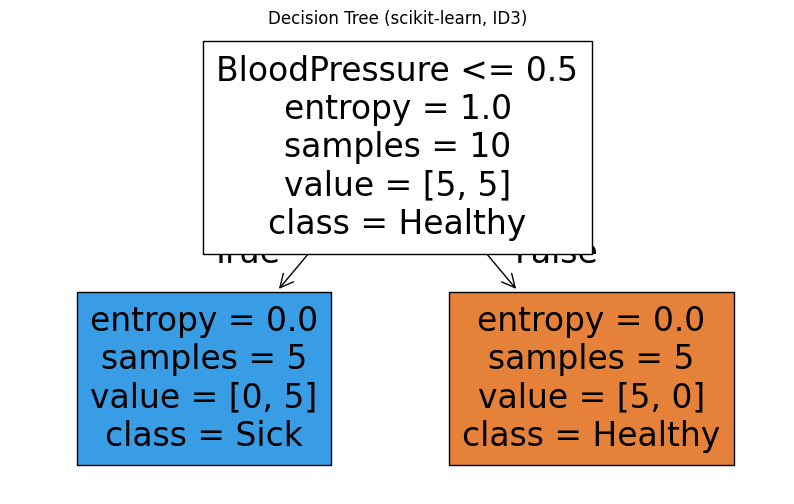


Prediction for (Age=50, Low BP, Normal Cholesterol): Healthy


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# --- Dataset ---
data = {
    'Age':        [30,45,50,35,60,55,40,25,65,45],
    'BloodPressure': ['High','Low','High','Low','High','Low','High','Low','High','Low'],
    'Cholesterol':   ['High','Normal','High','Normal','High','Normal','High','Normal','High','Normal'],
    'Diagnosis':     ['Sick','Healthy','Sick','Healthy','Sick','Healthy','Sick','Healthy','Sick','Healthy']
}
df = pd.DataFrame(data)

# --- Encode categorical features ---
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_diag = LabelEncoder()

df['BP_enc'] = le_bp.fit_transform(df['BloodPressure'])
df['Chol_enc'] = le_chol.fit_transform(df['Cholesterol'])
df['Diag_enc'] = le_diag.fit_transform(df['Diagnosis'])

# Features and target
X = df[['Age', 'BP_enc', 'Chol_enc']]
y = df['Diag_enc']

# --- Train Decision Tree (ID3-like, using entropy) ---
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(X, y)

# --- Visualization ---
plt.figure(figsize=(10,6))
plot_tree(model, 
          feature_names=['Age','BloodPressure','Cholesterol'],
          class_names=le_diag.classes_,
          filled=True)
plt.title("Decision Tree (scikit-learn, ID3)")
plt.show()

# --- Prediction ---
new_patient = pd.DataFrame([[50, le_bp.transform(['Low'])[0], le_chol.transform(['Normal'])[0]]],
                           columns=['Age','BP_enc','Chol_enc'])
pred = model.predict(new_patient)
print(f"\nPrediction for (Age=50, Low BP, Normal Cholesterol): {le_diag.inverse_transform(pred)[0]}")
